# Welcome to Machine Learning

Hello my beautiful, curious audience. I welcome you to the programming section of machine learning. We'll learn here, the basics of what machine learning is, how to use and program AI systems. 

Its by no means a comprehensive series, but it'll hopefully give you the right start.



# Scikit-Learn

You'll hear me say this multiple times that "I love scikit-learn".

I love scikit-learn. People in the industry love it. The ease of use that comes with scikit-learn, the amount of problems statements that could be solved using this package, its consistent API, its love at first sight. The things that used to be a headache are now couple lines of code away.

There are whole bunch of supervised and unsupervised problem statements and scikit-learn makes its API consistent within all of these approaches.

We have hyped deep neural networks so much but if we look at AI from afar, we'll realize that most of the complex problem statements could be solved using simpler ways. One of the simpler way is scikit-learn.

(Ignore if you haven't heard about keras or tensorflow before) 
Even when using keras api in python, scikit-learn provides consistent class wrappers for tensorflow.

### Problem Statement for supervised learning

When we have some data which requires for us to predict numerical or categorical values, that's in simple words supervised learning. We'll talk more as we get comfortable with scikit-learn. For now, let's understand by an example.

Our objective is to **predict the consumption of ice-cream based on the temperature of a city**

**Please Note**: At this point, I expect my audience to have gone through the *chapter 1 - Linear Regression simplified with Mathematics* to have basic (sweet sweet basic) intuition of line equation and how a machine learning model uses an equation and hyper-parameters in the backend to evaluate erros and make its predictions. 

### Learn the intuition rather than the syntax

Google: "python 3 import linear regression scikit-learn" and you'll find the import statement for linear regression and its usage on scikit-learn's official documentation or on other websites. So, no need to remember these statements. No one in the data or AI industry will ever ask you these functions in any interview. Interviewers are only interested in your problem solving abilities, if you're able to solve a particular AI problem or not. 

Reason being: **Python recieves timely updates**, check the current version below

In [1]:
!python --version

Python 3.10.9


I'm currently running this notebook on my portable local machine (old laptop). So, the python version I'm using might be different than yours. Google colab might have a different python version. 

So, with different python versions, comes incompatibility with various packages because the packages that we import inside python, they too get updates.

One pandas function might work on older versions of python while it might not be supported for updated python version. So, nobody is expected to cram the function names.

**Optional Note** for further reading:

At the time of writing this script, python 3.11.1 (latest version) is out but I'm still using python 3.10.9 and I have no plans to upgrade my python version for next 10 or so months because of some projects which I started with python 3.10.9. I can't midway upgrage my python version and expect every imported functionalities to work perfectly. The projects in discussion require hardware acceleration on neural nets and I'm using external executables to enable the fuctionalities of CUDA acceleration and in windows 10 os, those are supported only for python 3.10. 

It's not like I'm limited to python 3.10.9. We as regular programmers, we install multiple versions of python according to the need of the projects. 

Point is, a time comes when it becomes hard to track all the import statements for different python versions. Then complexity increases exponentially as we start to use multiple programming language for our workflow. I often switch between R, c++, c# and Python depending on the task. 

Google colab users don't need to worry about multiple python versions as they keep their eco-system very stable and updated.

Any how, this is why we are not expected to cram function names.

### Numpy and pandas

Just blindly import these two packages. They are used in almost every data related python scripts.


In [2]:
import numpy as np
import pandas as pd

### Import the dataset

In [3]:
data = """,cons,income,price,temp
1,0.386,78,0.27,41
2,0.374,79,0.282,56
3,0.393,81,0.277,63
4,0.425,80,0.28,68
5,0.406,76,0.272,69
6,0.344,78,0.262,65
7,0.327,82,0.275,61
8,0.288,79,0.267,47
9,0.269,76,0.265,32
10,0.256,79,0.277,24
11,0.286,82,0.282,28
12,0.298,85,0.27,26
13,0.329,86,0.272,32
14,0.318,83,0.287,40
15,0.381,84,0.277,55
16,0.381,82,0.287,63
17,0.47,80,0.28,72
18,0.443,78,0.277,72
19,0.386,84,0.277,67
20,0.342,86,0.277,60
21,0.319,85,0.292,44
22,0.307,87,0.287,40
23,0.284,94,0.277,32
24,0.326,92,0.285,27
25,0.309,95,0.282,28
26,0.359,96,0.265,33
27,0.376,94,0.265,41
28,0.416,96,0.265,52
29,0.437,91,0.268,64
30,0.548,90,0.26,71"""

We have a multi line string which contains comma separated values. To import this multi line string in pandas, we'll use built-in python module io which contains StringIO function.


In [4]:
from io import StringIO

In [5]:

icecream = pd.read_csv(StringIO(data), sep=",", header=0)
icecream.head(6)

,Unnamed: 0,cons,income,price,temp
0,1,0.386,78,0.270,41
1,2,0.374,79,0.282,56
2,3,0.393,81,0.277,63
3,4,0.425,80,0.280,68
4,5,0.406,76,0.272,69
5,6,0.344,78,0.262,65


In [6]:
icecream.columns

Index(['Unnamed: 0', 'cons', 'income', 'price', 'temp'], dtype='object')

"unnamed:0" column looks irrelevant and useless as at least from afar it looks like it contains only row numbers of excel sheet that the data belonged to. So, let's drop it.

cons is the column name for consumption of icecream

temp is the temperature of a city

Any how, our problem statement is to predict consumption of icecream based on temperature in a city. So, columns other than temp and cons are irrelevant for our study

In [7]:
icecream.drop(["Unnamed: 0", "income", "price"], axis=1, inplace=True)

In [8]:
icecream.head()

,cons,temp
0,0.386,41
1,0.374,56
2,0.393,63
3,0.425,68
4,0.406,69


Now, we have past data of temperature vs consumption. It kind of obvious that with high temperature climate, more people will get inclined to buy ice creams.

Our problem statement is to predict that relation for which we will require a linear regression ML model.

# General Checks

Now lets say we train a machine learning model using some data and now the accuracy with which the model makes its predictions is say 100%.

At this point you might be inclined to think that "we've done it, it's 100% accurate. Let's launch this system for the world"

Now new people use this system and of course they will punch in some data that the machine learning model has never seen. Now they noticed that the ML model we were so pompous about does not perform half as good as advertised.

"What is going on? This was supposed to work accurately."

**Model Evaluation**

The problem is we evaluated the model on the same data that we trained the model on.

So, of course once a ML model has seen the data, its going to predict outcomes from the same training data accurately.

How do we rectify the problem?

How do we make sure if the system is ready to be launched.

Welcome to the disaster of machine learning. Model Evaluation. If AI was really as simple as writing a bunch of code. Just about anybody would have become AI engineer. Its not tough either, its just that people generally forget the basic general checks to do before training a model.

**Solution**

So, we split our dataset into two separate sets.

**Training dataset** and **Test Dataset**

To be precise, we split the data into 3 sets, training, cross-validation and test sets. But for the purpose of learning, we'll choose to split our dataset into just 2 datasets. 

As you might have guessed, we train our model using Training Dataset and then evaluate accuracy (or other error metrics) using the test dataset.

This approach has a lot of benefits which we will study later.

First, let's do our linear regression activity to get comfortable with the whole process.

In [9]:
icecream.head(6)

,cons,temp
0,0.386,41
1,0.374,56
2,0.393,63
3,0.425,68
4,0.406,69
5,0.344,65


In our problem statement, we will use temperature to predict consumption.

So, temperature here is an independent variable using which we predict consumption, a dependent variable.

Generally, we have different notations for independent and dependent variables.

**Independent variable**: X, attributes, features, covariates

**Dependent variable**: Y, target, output

**Rows of dataframe**: Instances, Training examples 

# Split independent and dependent variables in original dataframe and reshape

In [10]:
X = np.array(icecream["temp"])
X

array([41, 56, 63, 68, 69, 65, 61, 47, 32, 24, 28, 26, 32, 40, 55, 63, 72,
       72, 67, 60, 44, 40, 32, 27, 28, 33, 41, 52, 64, 71], dtype=int64)

In [11]:
X.shape

(30,)

At this point, we have inside X the independent variable, but for python its shape is ambiguous. So, we need to tell python that our dataset array X had a definite shape of rows and columns, that is 30 rows, 1 column. 30 instances / examples as rows and 1 feature as independent variable.

In [12]:
X.reshape(30, 1)

array([[41],
       [56],
       [63],
       [68],
       [69],
       [65],
       [61],
       [47],
       [32],
       [24],
       [28],
       [26],
       [32],
       [40],
       [55],
       [63],
       [72],
       [72],
       [67],
       [60],
       [44],
       [40],
       [32],
       [27],
       [28],
       [33],
       [41],
       [52],
       [64],
       [71]], dtype=int64)

In the previous approach we'd have to manually punch in number of rows, but there's a flexible way to do it

In [13]:
X.reshape(-1, 1)

array([[41],
       [56],
       [63],
       [68],
       [69],
       [65],
       [61],
       [47],
       [32],
       [24],
       [28],
       [26],
       [32],
       [40],
       [55],
       [63],
       [72],
       [72],
       [67],
       [60],
       [44],
       [40],
       [32],
       [27],
       [28],
       [33],
       [41],
       [52],
       [64],
       [71]], dtype=int64)

In reshape, -1 as row count means adjust the rows count according to the column count which we specified as 1 column.

#### Reshape

Lets practice this reshape before moving forward. We have a 8 element array.

In [14]:
example_reshape = np.array([1,2,3,4,5,6,7,8])
example_reshape

array([1, 2, 3, 4, 5, 6, 7, 8])

In [15]:
example_reshape.reshape(4,2)

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [16]:
example_reshape.reshape(2,4)

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [17]:
example_reshape.reshape(8,1)

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8]])

In [18]:
example_reshape.reshape(1,8)

array([[1, 2, 3, 4, 5, 6, 7, 8]])

In [19]:
example_reshape.reshape(2,2,2)

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

**Dimension adjust with -1**

In [20]:
example_reshape.reshape(-1,2)

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [21]:
example_reshape.reshape(4,2)

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [22]:
example_reshape.reshape(2,-1)

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [23]:
example_reshape.reshape(2,4)

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

### Reshape variables X and Y

In [24]:
X = X.reshape(-1, 1)
X

array([[41],
       [56],
       [63],
       [68],
       [69],
       [65],
       [61],
       [47],
       [32],
       [24],
       [28],
       [26],
       [32],
       [40],
       [55],
       [63],
       [72],
       [72],
       [67],
       [60],
       [44],
       [40],
       [32],
       [27],
       [28],
       [33],
       [41],
       [52],
       [64],
       [71]], dtype=int64)

In [25]:
Y = np.array(icecream["cons"])
Y = Y.reshape(-1, 1)
Y

array([[0.386],
       [0.374],
       [0.393],
       [0.425],
       [0.406],
       [0.344],
       [0.327],
       [0.288],
       [0.269],
       [0.256],
       [0.286],
       [0.298],
       [0.329],
       [0.318],
       [0.381],
       [0.381],
       [0.47 ],
       [0.443],
       [0.386],
       [0.342],
       [0.319],
       [0.307],
       [0.284],
       [0.326],
       [0.309],
       [0.359],
       [0.376],
       [0.416],
       [0.437],
       [0.548]])

# Split into training and test set

Again we don't need to remember the import statements. 

Google: "split data into training and test dataset python 3 scikit-learn", and you'd find different clever ways to do it.

In real world datasets, data is messy and we have to split our dataset based on some conditions but to keep it simple and straight, we'll use train_test_split method to split our dataset into train and test set.


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
trainX, testX, trainY, testY = train_test_split(
    X, Y, test_size=0.2
)

**Take some time to get adjusted with the split**

**trainX**: training set for X

**testX**: test set for X

**trainY**: training set for Y

**testY**: test set for Y

Our initial dataframe has 30 rows, 2 columns.

After the split, we have 24 rows in training arrays (trainX, trainY) and 6 rows in test arrays (testX, testY)

In [28]:
icecream.shape

(30, 2)

In [29]:
trainX.shape

(24, 1)

In [30]:
trainY.shape

(24, 1)

In [31]:
testX.shape

(6, 1)

In [32]:
testY.shape

(6, 1)

### Import Linear Regression 

In [33]:
from sklearn.linear_model import LinearRegression


Call the LinearRegression class that we imported with sklearn

In [34]:

reg = LinearRegression()


**All hail scikit-learn**

I love scikit-learn, banzai.

All we need to do to train the model is pass train arrays inside the fit method and that's it. Model will be trained on the train arrays.


In [35]:
reg.fit(trainX, trainY)

LinearRegression()


**Note**: Even though, we have trained the model by scikit-learn defaults, we haven't yet tuned the hyper-parameters which we will discuss at a later time. Trust scikit-learn, it makes our life easy.

We'll now use random temperature value/s to predict consumption value.

**Remember to make its shape similar to the shape of X, independent variable** (1 column)

In [36]:
temperature = np.array(55).reshape(-1,1)
temperature

array([[55]])

In [37]:
predictions = reg.predict(temperature)

predictions

array([[0.38880758]])

In [38]:
temperature_array = np.array([55, 40, 50, 60]).reshape(-1, 1) # 1 column
temperature_array

array([[55],
       [40],
       [50],
       [60]])

In [39]:
predictions_array = reg.predict(temperature_array)
predictions_array

array([[0.38880758],
       [0.34217563],
       [0.3732636 ],
       [0.40435156]])

Predicted array followed the same shape as of input independent variable array i.e. temperature_array

Lets evaluate using the test dataset. We already have the actual consumption values from test set (testY). Lets make predictions using the values of test set of independent variable (testX) and call its predictions as predictionsY.

In [40]:
predictionsY = reg.predict(testX)
predictionsY

array([[0.31730526],
       [0.41989555],
       [0.36393721],
       [0.31730526],
       [0.40435156],
       [0.34217563]])

Actual values, dependent values of test set (testY)

In [41]:
testY

array([[0.284],
       [0.344],
       [0.288],
       [0.269],
       [0.342],
       [0.307]])

# Regression score (Optional)

Google: "Check regression score python 3 sklearn" for more info.

Remember, the slope (a) and y_intercept (b) of regression line. $$Y = aX + b$$

This is the y_intercept (b), bias

In [42]:
b = reg.intercept_
b

array([0.21782377])

In [43]:
b.shape

(1,)

This is the slope (a) 

In [44]:
a = reg.coef_
a

array([[0.0031088]])

Look closer shape of a is different from the shape of b, so we'll reshape a because in line equation slope and intercept are constants (not arrays)

In [45]:
a.shape

(1, 1)

In [46]:
a = a.reshape(1,)
a

array([0.0031088])

In [47]:
a.shape

(1,)

### Visualize using line equation

Let's use the equation $$Y = aX + b$$ to plot a line

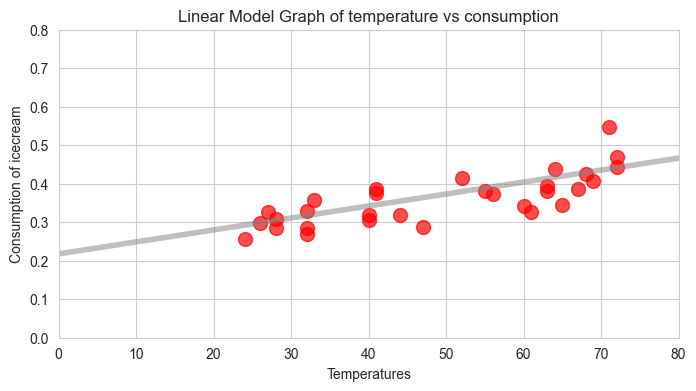

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline

# Create dummy x values
x = np.linspace(0, 80, 10)

# Line equation: Create dummy y values by using dummy x values 
y = a * x + b

plt.figure(figsize=(8, 4))
plt.plot(x, y, c="grey", lw=4, alpha=0.5)
plt.title("Linear Model Graph of temperature vs consumption")
plt.xlabel("Temperatures")
plt.ylabel("Consumption of icecream")
plt.ylim([0, 0.8])
plt.xlim([0, 80])
plt.scatter(icecream["temp"], icecream["cons"], c="red", s=100, alpha=0.7)
plt.show()

It is clear that the line with y_intercept (b) = 0.212 and slope (a) = 0.003 is the **line of best fit**.

### Root Mean Squared Error

Can be intuitively thought of as a L2 norm or **average of the error**, like how far our predictions are expected to lie with respect to actual value.

Remember, euclidian distance? Distance formula. That's L2 norm. Squared root of squares of difference.

We had 3 training examples in chapter 1. 

**Equation**: $$Y = aX + b$$

**Hyper-parameters**: slope (a) and co-efficient (b). According to that, rmse becomes

$$RMSE(a,b) = \sqrt{ \frac{1}{2m} \sum\limits_{i=0}^{m-1} (predictedValue^{(i)} - actualValue^{(i)} )^2}$$ 

    where,
    m = 3: total training examples
    i = 0, 1, 2
    
$$RMSE(a,b) = \sqrt{ \frac{1}{2*3} ((pred0 - actual0)^2 + (pred1 - actual1)^2 + (pred2 - actual2)^2)}$$ 

In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
rmse = np.sqrt(mean_squared_error(testY, predictionsY))
rmse

0.05787094220019479

### Compare rmse with difference in actual values vs predicted values

The difference_error column contains absolute difference between actual values and predicted values.

In [51]:
RMSE_df = pd.DataFrame({
    "actual values" : np.array(icecream["cons"]),
    "predicted values" : reg.predict(np.array(icecream["temp"]).reshape(-1,1)).reshape(-1)
})
RMSE_df["difference_error"] = np.absolute(RMSE_df["actual values"] - RMSE_df["predicted values"])
RMSE_df["rmse"] = np.repeat(rmse, icecream.shape[0])
RMSE_df

,actual values,predicted values,difference_error,rmse
0,0.386,0.345284,0.040716,0.057871
1,0.374,0.391916,0.017916,0.057871
2,0.393,0.413678,0.020678,0.057871
3,0.425,0.429222,0.004222,0.057871
4,0.406,0.432331,0.026331,0.057871
5,0.344,0.419896,0.075896,0.057871
6,0.327,0.407460,0.080460,0.057871
7,0.288,0.363937,0.075937,0.057871
8,0.269,0.317305,0.048305,0.057871
9,0.256,0.292435,0.036435,0.057871


### Visualize using Seaborn

[]

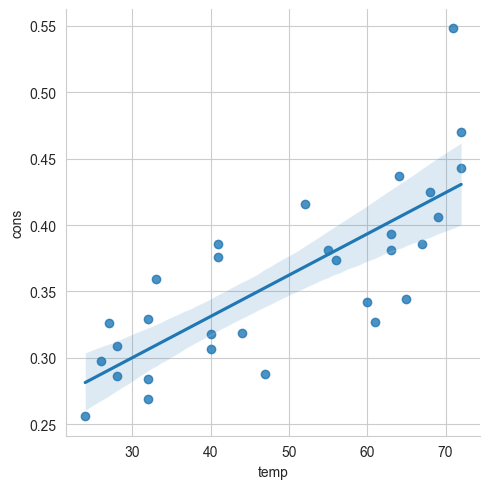

In [52]:
sns.lmplot(data = icecream, x="temp", y="cons")
plt.plot()

### Score

**score** returns the coefficient of determination of the prediction

In [53]:
reg.score(trainX, trainY)

0.660686578618846